In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 




from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# code to produce the summary data (.csv file) lives here: 
# /Users/floorbroekgaarden/Projects/GitHub/BlackHole-NeutronStar/otherCode/WriteRatesToCSV_EM.py

changed 3


In [2]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))

            
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']


In [3]:
def plotRatesLightestBHfirst(whichRate='intrinsic', ylims=[0,1]):#, CSVdir='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/lightestBHformsFirst'):
    
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5.5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    
    NSBHColour =  'blueviolet'
    
    nrDATAready = 20
    nModels=20
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100
    
    iii=0
    namesEMlist =['BHNS', 'NSBH']

    ind_t = 1
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        for ind_EM, EMtype in enumerate(namesEMlist):
            if ind_EM ==0:
                df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_BHBH_AllDCOsimulation.csv'
            else:
                df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/lightestBHformsFirst/rates_MSSFR_Models_BHBH_lightestFormsFirst.csv'
            
            ind_t = 1

            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][:nModels]
                if ind_L==0:
                    print('the intrinsic fiducial rate =',rates[0]) 

                ylabel = r'$\rm{f}_{\rm{MRR}}^{0}$ '

            elif whichRate=='observed':
                rates = rates_L[1::2][:nModels]
                if ind_L==0:
                    print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$\rm{f}_{\rm{MRR}}^{\rm{det}}$ '




            if EMtype=='BHNS':
                rates_BHNS = rates
            elif EMtype==namesEMlist[1]:
                rates_NSBH = rates


        rates_NSBH = rates_NSBH * (1./rates_BHNS)

        maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_NSBH)))
        minRatio_BHNS = np.min(np.concatenate(([minRatio_BHNS], rates_NSBH)))
            
        if ind_L==0:
            COLOR='crimson'
            zorder = 100
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[0]
            ALPHA=1
          
        elif MSSFRname=='231':
            COLOR='teal'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls=MSSFRlinestyles[1]
            ALPHA=1
        elif MSSFRname=='312': 
            COLOR='c'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[2]
            ALPHA=1
        else:
            COLOR= 'lightgray' 
            zorder=2
            label=None      
            ls = MSSFRlinestyles[0]
            ALPHA=0.1
            
            
        rates_BHNS = (rates_BHNS / rates_BHNS)    #* 100 

        axe.plot(range(len(rates)), rates_NSBH, c=NSBHColour, lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe.scatter(range(len(rates)), rates_NSBH, c=NSBHColour, s=30,  zorder=zorder, alpha=ALPHA) 
        

        

        axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=label, zorder=zorder, linestyle=ls, alpha=ALPHA)
        ################
        # plot fiducial result with a star
        if ind_L==0:


            axe.scatter(range(len(rates))[0], rates_NSBH[0],\
                               c=NSBHColour, s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
    
    
            print('the fiducial ratio =', rates_NSBH[0])
            
            
            
            
            
      ################      

    minn, maxx = minRatio_BHNS, maxRatio_BHNS
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
    textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
    yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
    axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

    textt_min = '{:0.2}'.format(minn/1.)
    textt_max = '{:0.2}'.format(maxx/1.)
    textt_min = r'$\rm{min} =  %s$'%textt_min
    textt_max = r'$\rm{max} =  %s$'%textt_max

        
    axe.text(-0.47, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
    axe.text(-0.47, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')


    
    
    
    
    xmin = -0.6
    xmax = nrDATAready -0.5 # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)


    for ll in [0.001, 0.01, .1, 1]:
        axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    axe.set_ylim(ylims[0], ylims[1] )

    
    # make up axes
    if ind_t ==1:
        xlabel = r'\textbf{binary population synthesis model} $\mu$'
    else:
        xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#     axe.set_yscale('log')


    
    ##### PHYSICAL NAMES 
    physicalnames = []
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(r'\textbf{%s}'%(bps_model) )
    axe.set_xticks(range(nModels))
    axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

    ##### SECOND AXIS ######
    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(xmin, xmax)

    ax2y.set_xticks(range(nModels))
    ax2y.set_xticklabels(physicalnames, fontsize=fs-4, rotation=30)#, orientation=30)    


    axe.set_ylim(ylims[0], ylims[1])



#     handles, labels = axe.get_legend_handles_labels()
#     mask=[1,41, 13]

    plt.tight_layout()
    plt.savefig('./lightestBHFormsFirst_fraction_' +whichRate + '.png', dpi=600, transparent=False)
    plt.savefig('./lightestBHFormsFirst_fraction_' +whichRate + '.pdf', transparent=False) 
    
    plt.show()
    plt.close()

    return




the observed fiducial rate = 278.87649088232206
the observed fiducial rate = 219.00475288237888
the fiducial ratio = 0.7853109173508378


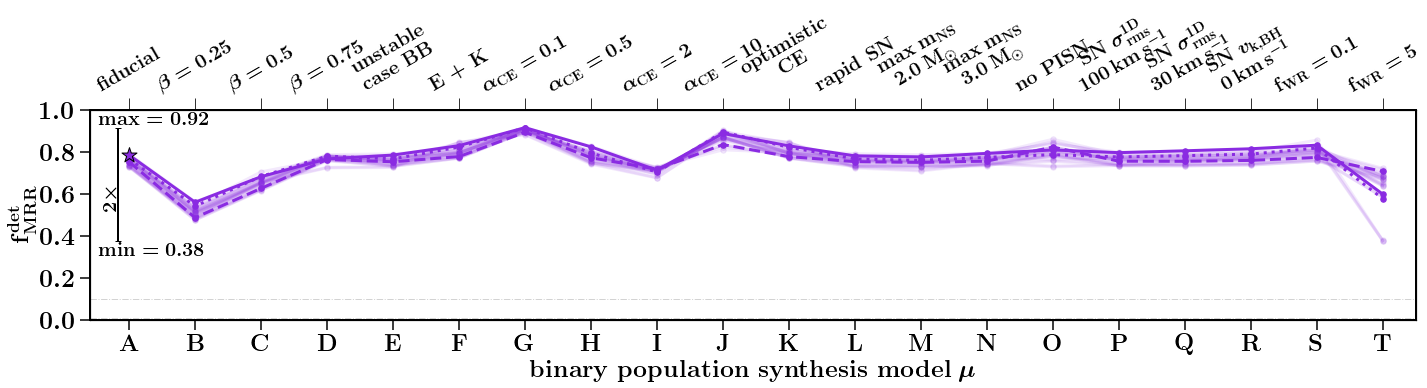

In [4]:
# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,1]
plotRatesLightestBHfirst(whichRate='observed', ylims=ylims) #, CSVdir=CSVdir)

the intrinsic fiducial rate = 33.52050521653553
the intrinsic fiducial rate = 16.015303071664437
the fiducial ratio = 0.47777630343602795


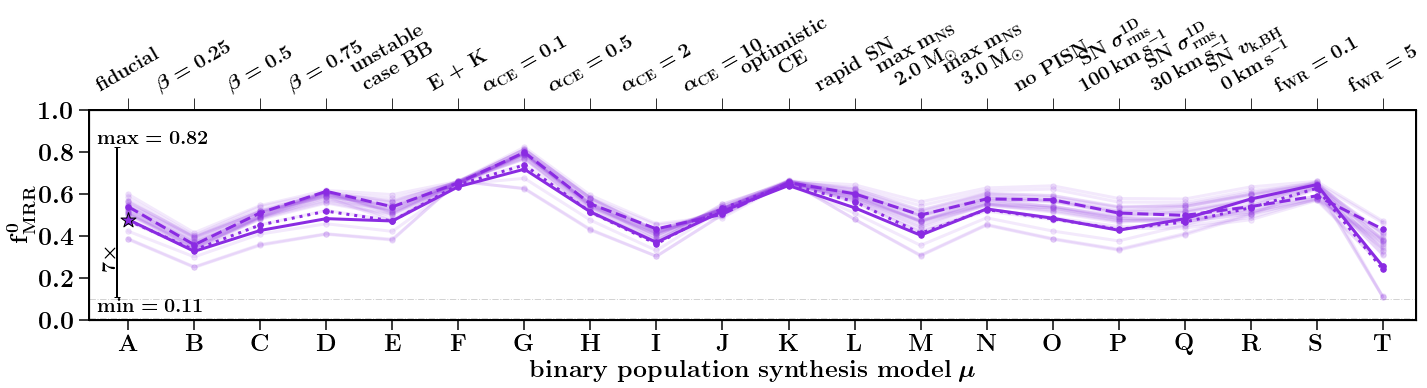

In [5]:
# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,1]
plotRatesLightestBHfirst(whichRate='intrinsic', ylims=ylims) #, CSVdir=CSVdir)

In [5]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
           
print('obtain index of the SFRD models that we want to highlight')
print('-----')
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
for ind_SFRD, SFRD in enumerate(MSSFRnameslistCSV):
    if SFRD in ['.0.0.0', '.2.3.1', '.3.1.2']:
        print(ind_SFRD, SFRD, (MSSFRnameslist[ind_SFRD]))
        print()
        
MSSFRheaderDict =  {'000':'.0.0.0', '111':'.1.1.1', '112':'.1.1.2', '113':'.1.1.3', '121':'.1.2.1', '122':'.1.2.2', '123':'.1.2.3', '131':'.1.3.1', '132':'.1.3.2', '133':'.1.3.3', '211':'.2.1.1',\
                    '212':'.2.1.2', '213':'.2.1.3', '221':'.2.2.1', '222':'.2.2.2', '223':'.2.2.3', '231':'.2.3.1', '232':'.2.3.2', '233':'.2.3.3', '311':'.3.1.1', '312':'.3.1.2', '313':'.3.1.3', '321':'.3.2.1', \
                    '322':'.3.2.2', '323':'.3.2.3', '331':'.3.3.1', '332':'.3.3.2', '333':'.3.3.3'}    


obtain index of the SFRD models that we want to highlight
-----
0 .0.0.0 000

16 .2.3.1 231

20 .3.1.2 312



# Figure with Formation Channels added: 

In [10]:
def plotRatesMRR_FC(whichRate='intrinsic', ylims=[0,1]):
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5.5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    
    NSBHColour =  'blueviolet'
    
    nrDATAready = 20
    nModels=20
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    minRatio_MRR = 100 
    maxRatio_MRR = -100 
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    List_formationchannelOptions = ['All', 'All MRR', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    ind_formationchannelOptions = [0,1,2,3,4,5,6]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    
    iii=0
    namesEMlist =['BHNS', 'NSBH']
    totalRates__ = np.zeros(20)

    ind_t = 1

    
    
    
    csvPath = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/lightestBHformsFirst/rates_MSSFR_Models_BHBH_MRR_FormationChannels.csv'     
    df_name = csvPath
    df = pd.read_csv(df_name, index_col=0).T
    
    for ind_c, whichChannel in enumerate(['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']):

        for ind_L, MSSFRname in enumerate(MSSFRnameslist):

            key_mssfr = MSSFRheaderDict[MSSFRname]
            rates_L = df[key_mssfr]



            if whichRate =='intrinsic':
                ind_wanted = dictFormationChannelIndex[whichChannel]*2
                rates = rates_L[ind_wanted::14][0:nModels]
                totalrates = rates_L[0::14][0:nModels]
                totalrates_MRR = rates_L[2::14][0:nModels]
#                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate ' ,'=',rates[0]) 

                ylabel = r'$\rm{f}_{\rm{MRR}}^{0}$'



            elif whichRate=='observed':
                ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                rates = rates_L[ind_wanted::14][0:nModels]

                totalrates = rates_L[1::14][0:nModels]
                totalrates_MRR = rates_L[3::14][0:nModels]
                
                if ind_L==0:
                    print('the observed fiducial rate for ' ,'=',rates[0]) 
                ylabel = r'$\rm{f}_{\rm{MRR}}^{\rm{det}}$ '


            ls = '-'
            label=None
            zorder=2
            ALPHA = 0.2 


            ratesRatio = np.asarray(rates)/np.asarray(totalrates)
            ind_color = dictFormationChannelIndex[whichChannel]
            axe.plot(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], lw=2, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
            axe.scatter(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], s=50, label=None, zorder=zorder+1, alpha=1, linestyle=ls) #c=BPScolors

            if ind_L==0:
                totalRates__ += np.asarray(rates)/np.asarray(totalrates)

            if ind_c==0:
                ratesRatio = np.asarray(totalrates_MRR)/np.asarray(totalrates)
                axe.plot(range(len(rates)), ratesRatio, c='k', lw=2, label=None, zorder=1E4, alpha=0.9, linestyle='-')
                axe.scatter(range(len(rates)), ratesRatio, c='k', s=50, label=None, zorder=1E4+1, alpha=1, linestyle='-') #c=BPScolors
                
                minRatio_MRR = np.min(np.concatenate((ratesRatio, [minRatio_MRR])))
                maxRatio_MRR = np.max(np.concatenate((ratesRatio, [maxRatio_MRR])))
                if ind_L==0:
                    print('rate:')
                    print(ratesRatio)
                


    print(totalRates__)
    print()

            
            
#       ################      

    minn, maxx = minRatio_MRR, maxRatio_MRR
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.37, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=6, ecolor='k', elinewidth=3.5)

    textt_min = '{:0.2}'.format(minn/1.)
    textt_max = '{:0.2}'.format(maxx/1.)
    textt_min = r'$%s$'%textt_min #r'$\rm{min} =  %s$'%textt_min
    textt_max = r'$%s$'%textt_max #r'$\rm{max} =  %s$'%textt_max
    axe.text(-0.67, minn*0.92, s=textt_min, rotation = 0, fontsize = fs-6, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
    axe.text(-0.67, maxx*(1./0.98), s=textt_max, rotation = 0, fontsize = fs-6, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')

    
    xmin = -1. #-0.6
    xmax = nrDATAready -0.5 # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)


    for ll in [0.2, 0.4, 0.6, 0.8, 1]:
        axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    axe.set_ylim(ylims[0], ylims[1] )

    
    # make up axes
    if ind_t ==1:
        xlabel = r'\textbf{binary population synthesis model} $\mu$'
    else:
        xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)

    
    ##### PHYSICAL NAMES 
    physicalnames = []
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(r'\textbf{%s}'%(bps_model) )
    axe.set_xticks(range(nModels))
    axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

    ##### SECOND AXIS ######
    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(xmin, xmax)
    ax2y.set_xticks(range(nModels))
    ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30)#, orientation=30)    


    axe.set_ylim(ylims[0], ylims[1])


    x__ = -100*np.ones(5)
    channelLabels = [r'$\textbf{Classic common envelope}$', r'$\textbf{Only stable mass transfer}$', r'$\textbf{Other}$']
    axe.plot(x__,x__ , lw=15, color='k', label = r'$\textbf{All MRRs}$')
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE',  'other']):
        axe.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = channelLabels[ind_c])


    lgd = f.legend(fontsize=fs-1, ncol=4,bbox_to_anchor=(0.92, 1.12)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    

    plt.grid(True)
    plt.tight_layout()
    
    plt.savefig('./Rate_MRR_formationChannel_' +whichRate + '.png', dpi=600, transparent=False, bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.savefig('./Rate_MRR_formationChannel_' +whichRate + '.pdf', transparent=False, bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center') 
    
    plt.show()
    plt.close()

    return




the intrinsic fiducial rate  = 1.2450524900556648
rate:
[0.4777763  0.32656596 0.42618208 0.48242033 0.47126591 0.63487688
 0.71811749 0.51450342 0.36928243 0.5177386  0.64009798 0.53426355
 0.40335608 0.52867611 0.48444614 0.42703225 0.48167615 0.57595677
 0.64428832 0.25551465]
the intrinsic fiducial rate  = 13.948791171140392
the intrinsic fiducial rate  = 7.796414569024685e-11
the intrinsic fiducial rate  = 0.041735518975032006
the intrinsic fiducial rate  = 0.7797238914153812
[0.4777763  0.32656596 0.42618208 0.48242033 0.47126591 0.63487688
 0.71811749 0.51450342 0.36928243 0.5177386  0.64009798 0.53426355
 0.40335608 0.52867611 0.48444614 0.42703225 0.48167615 0.57595677
 0.64428832 0.25551465]



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:181: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:182: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later


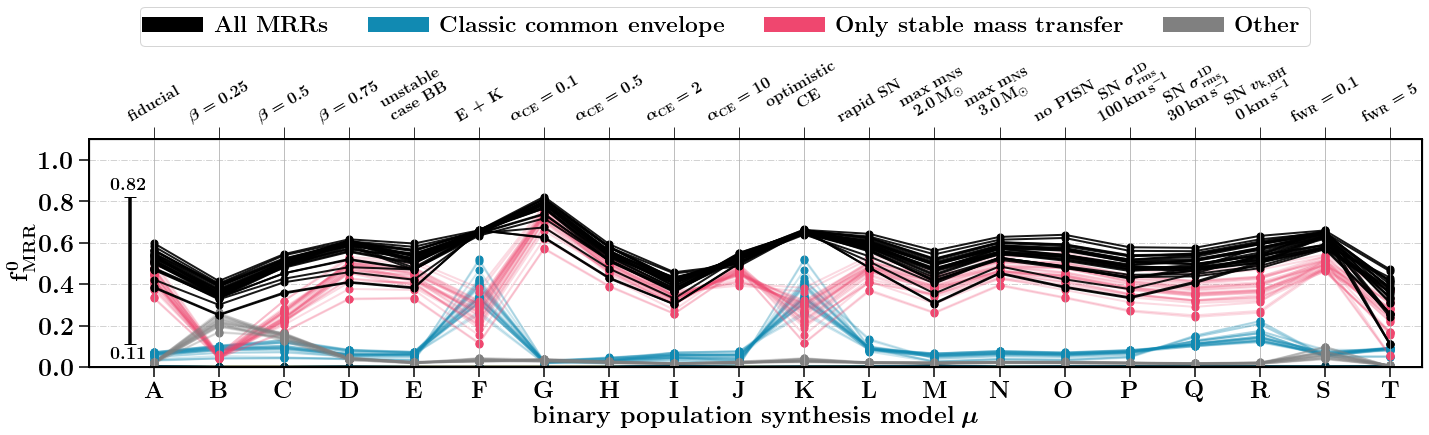

In [11]:
# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,1.1]
plotRatesMRR_FC(whichRate='intrinsic', ylims=ylims) #, CSVdir=CSVdir)

the observed fiducial rate for  = 19.961744002812942
rate:
[0.78531092 0.56044433 0.68246765 0.76698041 0.78528805 0.83014186
 0.91596961 0.82436286 0.71295053 0.88830602 0.82898485 0.78139826
 0.77643177 0.7932327  0.80954731 0.79672606 0.80564354 0.81525293
 0.83235528 0.59884096]
the observed fiducial rate for  = 186.22774760430602
the observed fiducial rate for  = 0.0034256624880866
the observed fiducial rate for  = 0.0128087737231007
the observed fiducial rate for  = 12.799026839048626
[0.78531092 0.56044433 0.68246765 0.76698041 0.78528805 0.83014186
 0.91596961 0.82436286 0.71295053 0.88830602 0.82898485 0.78139826
 0.77643177 0.7932327  0.80954731 0.79672606 0.80564354 0.81525293
 0.83235528 0.59884096]



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:181: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:182: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later


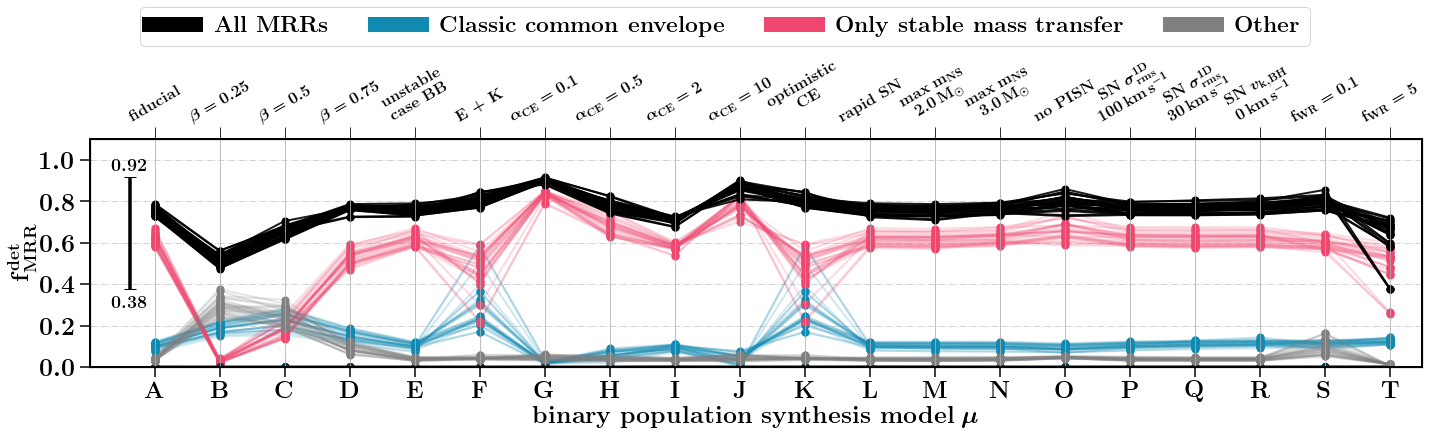

In [12]:
# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,1.1]
plotRatesMRR_FC(whichRate='observed', ylims=ylims) #, CSVdir=CSVdir)

# Other versions of this plot 


the observed fiducial rate for  BBH = 19.961744002812942
the observed fiducial rate for  BBH = 186.22774760430602
the observed fiducial rate for  BBH = 0.0034256624880866
the observed fiducial rate for  BBH = 0.0128087737231007
the observed fiducial rate for  BBH = 12.799026839048626


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:184: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:186: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later


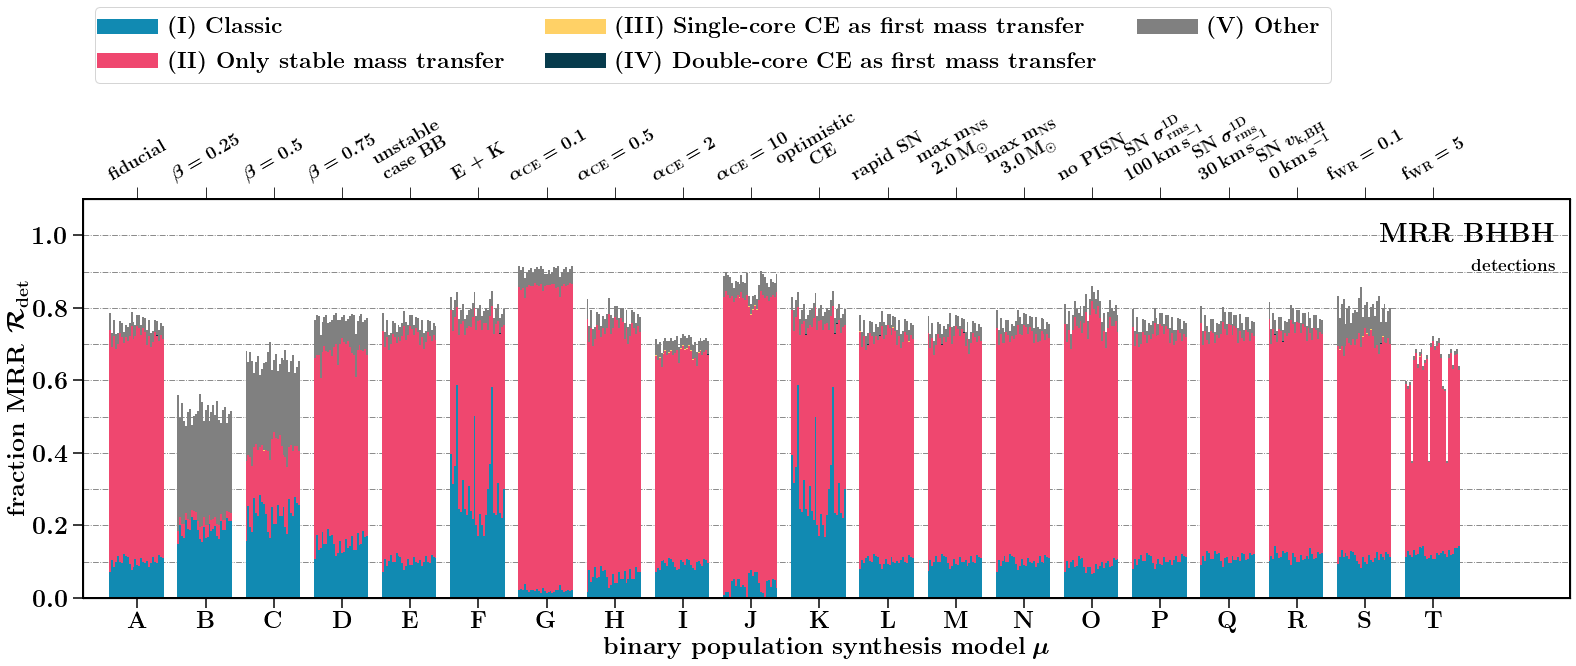

In [10]:
def plotFormationChannelRates_vbars(whichRate='intrinsic', CSVdir='name'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,8), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    List_formationchannelOptions = ['All', 'All MRR', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    ind_formationchannelOptions = [0,1,2,3,4,5,6]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    dx = 0.4 #0.3
    dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) #+ ind_m
    dxlen = (2*dx)/len(MSSFRnameslist)
    

    for ind_t, DCOtype in enumerate(['BBH']):
        print()
        axe = axes #[ind_t]
        DCOname = DCOname_dict[DCOtype]
        
        
#         stringgg =  'formation_channels'
#         csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     
        csvPath = CSVdir  

        df_name = csvPath
        df = pd.read_csv(df_name, index_col=0).T

        for ind_L, MSSFRname in enumerate(MSSFRnameslist):
            ratesRatio_low = np.zeros(nModels)
            ratesRatio     = np.zeros(nModels)
            

            x_positions_ = range(nModels)
            xx_ = dxrange[ind_L]
            x_positions = np.asarray(x_positions_) + xx_

                
            key_mssfr = MSSFRheaderDict[MSSFRname]
            rates_L = df[key_mssfr]
            
            if MSSFRname=='231':
                zorder=10
                label=MSSFRnameslist[ind_L] 
                ls = MSSFRlinestyles[1]
                ALPHA=1
            elif MSSFRname=='312':
                zorder=10
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[2]
                ALPHA=1
            else:
                zorder=2
                label=None    
                ls = MSSFRlinestyles[0]
                ALPHA=0.1
                
            for ind_c, whichChannel in enumerate(['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']):

                if whichRate =='intrinsic':
                    ind_wanted = dictFormationChannelIndex[whichChannel]*2
                    rates = rates_L[ind_wanted::14][0:nModels]
                    totalrates = rates_L[0::14][0:nModels]
                    totalrates_MRR = rates_L[2::14][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'\textbf{fraction MRR} $\,\mathcal{R}_{\rm{m}}^{{0}}$'



                elif whichRate=='observed':
                    ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                    rates = rates_L[ind_wanted::14][0:nModels]
                    totalrates = rates_L[1::14][0:nModels]
                    totalrates_MRR = rates_L[3::14][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0])   
                    ylabel = r'\textbf{fraction MRR} $\, \mathcal{R}_{\rm{det}}$'



                
                ratesRatio += np.asarray(rates)/np.asarray(totalrates)
#                 ratesRatio += np.asarray(rates)/np.asarray(totalrates)

                axe.bar(x_positions, height=(ratesRatio-ratesRatio_low),  bottom=ratesRatio_low, color=channelColorDict[whichChannel], alpha=1, \
                       width=dxlen, zorder=100)
                
                ratesRatio_low += np.asarray(rates)/np.asarray(totalrates)
                



        xmin = -0.8
        xmax = nModels +1. # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


        for ll in [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
            axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=0.9, zorder=0)
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )



#       # make up axes
        if ind_t ==0:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '

        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)


        # set physical labels on bottom
        if ind_t==0:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            ind_label = dictFormationChannelIndex[whichChannel]-1
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.99, 0.94, r'\textbf{MRR %s}'%TypesLabels[ind_t] , rotation = 0, fontsize = fs+3, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')
        axe.text(0.99, 0.85, r'\textbf{detections}' , rotation = 0, fontsize = 17, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')




        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-6, rotation=30)#, orientation=30)    
     

    
    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
    
    
    lgd = f.legend(fontsize=fs-1, ncol=3,bbox_to_anchor=(.85, 1.17)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    
#     draw_arrows(axes=axes)
    


    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.11)#2)
    plt.savefig('./MRR_' + whichRate  + '_vbars.pdf', transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.savefig('./MRR_' + whichRate  + '_vbars.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()
    print()
    
    return

nModels=20








# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
# CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/lightestBHformsFirst/rates_MSSFR_Models_BHBH_MRR_FormationChannels.csv'   
ylims =[[0,1.1],[0,1.1],[0,1.1]]
plotFormationChannelRates_vbars(whichRate='observed', CSVdir=CSVdir)


# Spins, Floor: Move this to other notebook

In [17]:
def plotRatesMRR_spins(whichRate='intrinsic', ylims=[0,1]):
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,5.5), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    
    NSBHColour =  'blueviolet'
    
    nrDATAready = 20
    nModels=20
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    minRatio_MRR = 100 
    maxRatio_MRR = -100 
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'LVKM1 spinning':'blue', 'LVKM2 spinning':'orange'}
    List_formationchannelOptions = ['All', 'All one spinning', 'LVKM1 spinning',  'LVKM2 spinning']
    ind_formationchannelOptions = [0,1,2,3]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    
    iii=0
    namesEMlist =['BHNS', 'NSBH']
    totalRates__ = np.zeros(20)

    ind_t = 1

    
    
    
    csvPath = '/Users/floorbroekgaarden/Projects/GitHub/MRR_Project/dataFiles/rates_MSSFR_Models_BHBH_MRR_Spins.csv'     
    df_name = csvPath
    df = pd.read_csv(df_name, index_col=0).T
    
    for ind_c, whichSpin in enumerate(['LVKM1 spinning',  'LVKM2 spinning']):

        for ind_L, MSSFRname in enumerate(MSSFRnameslist):

            key_mssfr = MSSFRheaderDict[MSSFRname]
            rates_L = df[key_mssfr]



            if whichRate =='intrinsic':
                ind_wanted = dictFormationChannelIndex[whichSpin]*2
                rates = rates_L[ind_wanted::8][0:nModels]
                totalrates = rates_L[0::8][0:nModels]
                totalrates_spin = rates_L[2::8][0:nModels]
#                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate ' ,'=',rates[0]) 

                ylabel = r'$\rm{f}_{\rm{spinning BH}}^{0}$'



            elif whichRate=='observed':
                ind_wanted = (dictFormationChannelIndex[whichSpin]*2) +1
                rates = rates_L[ind_wanted::8][0:nModels]

                totalrates = rates_L[1::8][0:nModels]
                totalrates_spin = rates_L[3::8][0:nModels]
                
                if ind_L==0:
                    print('the observed fiducial rate for ' ,'=',rates[0]) 
                ylabel = r'$\rm{f}_{\rm{spinning BH}}^{\rm{det}}$ '


            ls = '-'
            label=None
            zorder=2
            ALPHA = 0.2 



            ratesRatio = np.asarray(rates)/np.asarray(totalrates)
            ind_color = dictFormationChannelIndex[whichSpin]
            axe.plot(range(len(rates)), ratesRatio, c=channelColorDict[whichSpin], lw=2, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
            axe.scatter(range(len(rates)), ratesRatio, c=channelColorDict[whichSpin], s=50, label=None, zorder=zorder+1, alpha=1, linestyle=ls) #c=BPScolors

            if ind_L==0:
                totalRates__ += np.asarray(rates)/np.asarray(totalrates)

            if ind_c==0:
                ratesRatio = np.asarray(totalrates_spin)/np.asarray(totalrates)
                axe.plot(range(len(rates)), ratesRatio, c='gray', lw=2, label=None, zorder=1, alpha=1, linestyle='-')
                axe.scatter(range(len(rates)), ratesRatio, c='gray', s=50, label=None, zorder=1, alpha=1, linestyle='-') #c=BPScolors
                
                minRatio_MRR = np.min(np.concatenate((ratesRatio, [minRatio_MRR])))
                maxRatio_MRR = np.max(np.concatenate((ratesRatio, [maxRatio_MRR])))
                if ind_L==0:
                    print('rate:')
                    print(ratesRatio)
                
#     axe.plot(range(len(rates)),totalRates__, c='purple', lw=10, label=None, zorder=1E5, alpha=1, linestyle='-')


    print(totalRates__)
    print()

            
            
#       ################      

    minn, maxx = minRatio_MRR, maxRatio_MRR
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.37, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
#     textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
#     yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
#     axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

    textt_min = '{:0.2}'.format(minn/1.)
    textt_max = '{:0.2}'.format(maxx/1.)
    textt_min = r'$\rm{min} =  %s$'%textt_min
    textt_max = r'$\rm{max} =  %s$'%textt_max

        
#     axe.text(-0.67, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
    axe.text(-0.67, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')


    
    
    
    
    xmin = -1. #-0.6
    xmax = nrDATAready -0.5 # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)


    for ll in [0.1, 0.2, 0.3, 0.4]:
        axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    axe.set_ylim(ylims[0], ylims[1] )

    
    # make up axes
    if ind_t ==1:
        xlabel = r'\textbf{binary population synthesis model} $\mu$'
    else:
        xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=20)
#     axe.set_yscale('log')


    
    ##### PHYSICAL NAMES 
    physicalnames = []
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(r'\textbf{%s}'%(bps_model) )
    axe.set_xticks(range(nModels))
    axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

    ##### SECOND AXIS ######
    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(xmin, xmax)

    ax2y.set_xticks(range(nModels))
    ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30)#, orientation=30)    


    axe.set_ylim(ylims[0], ylims[1])



#     handles, labels = axe.get_legend_handles_labels()
#     mask=[1,41, 13]
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('./Rate_MRR_spins_' +whichRate + '_update.png', dpi=600, transparent=False)
    plt.savefig('./Rate_MRR_spins_' +whichRate + '_update.pdf', transparent=False) 
    
    plt.show()
    plt.close()

    return




the intrinsic fiducial rate  = 0.0610838823845487
rate:
[0.12911398 0.12798414 0.06189879 0.0593663  0.13135303 0.25217159
 0.02773309 0.03590898 0.12607218 0.02596382 0.24871385 0.08537894
 0.18990124 0.09052994 0.12694824 0.1961985  0.32846984 0.31623087
 0.18243758 0.1434936 ]
the intrinsic fiducial rate  = 4.2668819142158805
[0.12911398 0.12798414 0.06189879 0.0593663  0.13135303 0.25217159
 0.02773309 0.03590898 0.12607218 0.02596382 0.24871385 0.08537894
 0.18990124 0.09052994 0.12694824 0.1961985  0.32846984 0.31623087
 0.18243758 0.1434936 ]



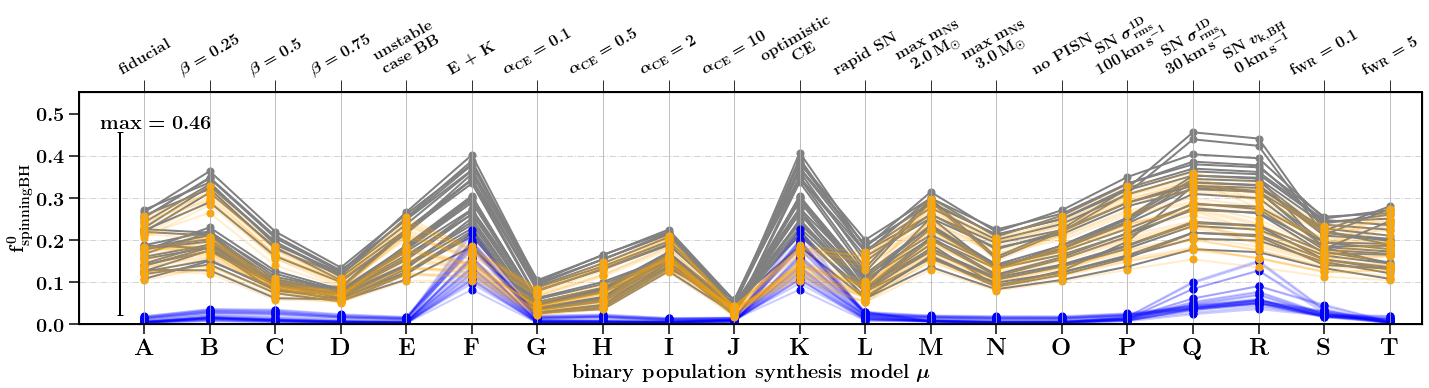

the observed fiducial rate for  = 0.1460857028680209
rate:
[0.02192147 0.03998373 0.01991662 0.01655529 0.02167796 0.10765434
 0.00770822 0.00874703 0.02002443 0.00249681 0.10928639 0.02153091
 0.02782909 0.01696287 0.02104328 0.02715006 0.03910837 0.03493451
 0.09902779 0.0205883 ]
the observed fiducial rate for  = 5.967308797291973
[0.02192151 0.03998373 0.01991662 0.01655529 0.02167796 0.10765434
 0.00770822 0.00874728 0.02002443 0.00249681 0.10928642 0.02153097
 0.02782909 0.01696295 0.02104328 0.02715006 0.03910837 0.03493451
 0.09902779 0.02058834]



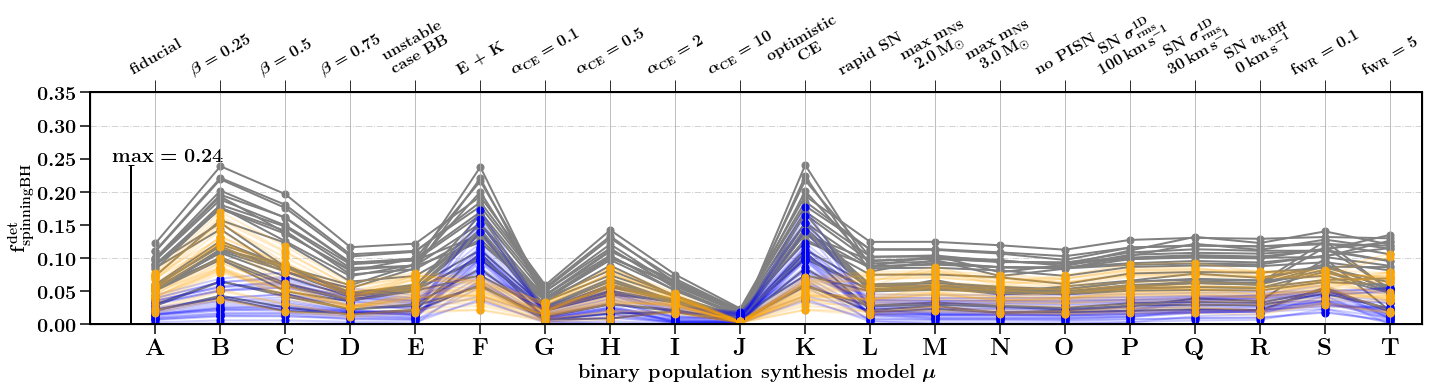

In [19]:
# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,.55]
plotRatesMRR_spins(whichRate='intrinsic', ylims=ylims) #, CSVdir=CSVdir)



# CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,.35]
plotRatesMRR_spins(whichRate='observed', ylims=ylims) #, CSVdir=CSVdir)

In [114]:
def plotMRRSpinsRates_vbars(whichRate='intrinsic', CSVdir='name'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,8), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    
    # channel colors 
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'LVKM1 spinning':'blue', 'LVKM2 spinning':'orange'}
    List_formationchannelOptions = ['All', 'All one spinning', 'LVKM1 spinning',  'LVKM2 spinning']
    ind_formationchannelOptions = [0,1,2,3]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    dictChannelsBHNSListBolt = [r'$ \chi_{\rm{BH,1}} > 0.05 \textbf{(LVK M1)}$', r'$ \chi_{\rm{BH,2}} > 0.05 \textbf{(LVK M2)}$']
    
    dx = 0.4 #0.3
    dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) #+ ind_m
    dxlen = (2*dx)/len(MSSFRnameslist)
    

    for ind_t, DCOtype in enumerate(['BBH']):
        print()
        axe = axes #[ind_t]
        DCOname = DCOname_dict[DCOtype]
        
        
#         stringgg =  'formation_channels'
#         csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     
        csvPath = CSVdir  

        df_name = csvPath
        df = pd.read_csv(df_name, index_col=0).T

        for ind_L, MSSFRname in enumerate(MSSFRnameslist):
            ratesRatio_low = np.zeros(nModels)
            ratesRatio     = np.zeros(nModels)
            

            x_positions_ = range(nModels)
            xx_ = dxrange[ind_L]
            x_positions = np.asarray(x_positions_) + xx_

                
            key_mssfr = MSSFRheaderDict[MSSFRname]
            rates_L = df[key_mssfr]
            
            if MSSFRname=='231':
                zorder=10
                label=MSSFRnameslist[ind_L] 
                ls = MSSFRlinestyles[1]
                ALPHA=1
            elif MSSFRname=='312':
                zorder=10
                label=MSSFRnameslist[ind_L]
                ls = MSSFRlinestyles[2]
                ALPHA=1
            else:
                zorder=2
                label=None    
                ls = MSSFRlinestyles[0]
                ALPHA=0.1
                
            for ind_c, whichSpin in enumerate(['LVKM1 spinning',  'LVKM2 spinning']):

                if whichRate =='intrinsic':
                    ind_wanted = dictFormationChannelIndex[whichSpin]*2
                    rates = rates_L[ind_wanted::8][0:nModels]
                    totalrates = rates_L[0::8][0:nModels]
                    totalrates_MRR = rates_L[2::8][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'\textbf{fraction spinning BH} $\,\mathcal{R}_{\rm{m}}^{{0}}$'



                elif whichRate=='observed':
                    ind_wanted = (dictFormationChannelIndex[whichSpin]*2) +1
                    rates = rates_L[ind_wanted::8][0:nModels]
                    totalrates = rates_L[1::8][0:nModels]
                    totalrates_MRR = rates_L[3::8][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0])   
                    ylabel = r'\textbf{fraction spinning BH} $\, \mathcal{R}_{\rm{det}}$'



                
                ratesRatio += np.asarray(rates)/np.asarray(totalrates)
#                 ratesRatio += np.asarray(rates)/np.asarray(totalrates)

                axe.bar(x_positions, height=(ratesRatio-ratesRatio_low),  bottom=ratesRatio_low, color=channelColorDict[whichSpin], alpha=1, \
                       width=dxlen, zorder=100)
                
                ratesRatio_low += np.asarray(rates)/np.asarray(totalrates)
                



        xmin = -0.8
        xmax = nModels +1. # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


        for ll in [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
            axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=0.9, zorder=0)
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )



#       # make up axes
        if ind_t ==0:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '

        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)


        # set physical labels on bottom
        if ind_t==0:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            ind_label = dictFormationChannelIndex[whichSpin]-1
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.99, 0.94, r'\textbf{%s with spinning BH}'%TypesLabels[ind_t] , rotation = 0, fontsize = fs+3, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')
        axe.text(0.99, 0.85, r'\textbf{detections}' , rotation = 0, fontsize = 17, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')




        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-6, rotation=30)#, orientation=30)    
     

    
    x__ = -100*np.ones(5)
    for ind_c, channel  in enumerate(['LVKM1 spinning',  'LVKM2 spinning']):
        plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
    
    
    lgd = f.legend(fontsize=fs-1, ncol=3,bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    
#     draw_arrows(axes=axes)
    


    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.11)#2)
    plt.savefig('./MRR_spins' + whichRate  + '_vbars.pdf', transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.savefig('./MRR_spins' + whichRate  + '_vbars.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()
    print()
    
    return

nModels=20







the observed fiducial rate for  BBH = 0.1096147360143534
the observed fiducial rate for  BBH = 5.036314520201074


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:186: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:188: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later


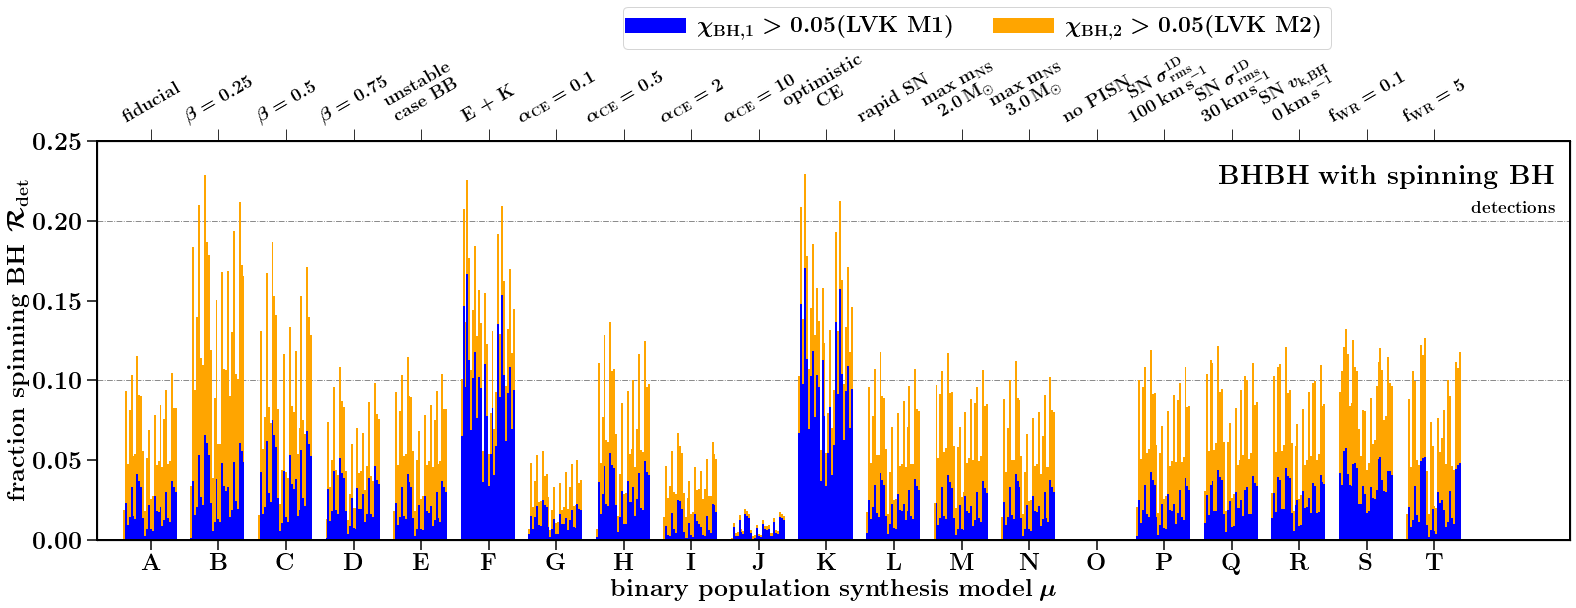

In [115]:
# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
# CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/lightestBHformsFirst/rates_MSSFR_Models_BHBH_MRR_Spins.csv'  
ylims =[[0,0.25],[0,1.1],[0,1.1]]
plotMRRSpinsRates_vbars(whichRate='observed', CSVdir=CSVdir)
